# Mic Board and Filters
### EECS16B: Designing Information Devices and Systems II, Spring 2021

Updated by Mia Mirkovic (2020)

miamirkovic@berkeley.edu

-----

Updated by Rafael Calleja (2021)

rafael.calleja@berkeley.edu

## Table of Contents

* Notes
    - [Main Lab Note](https://drive.google.com/file/d/1Kv5mKBud9F4IidCnMdNOK9Ws55VgR8l3/view?usp=sharing)
    - [Mic Board Note](https://drive.google.com/file/d/1Noi_zAl_Zl7LYr3R9lIwl38MsPUXmmFz/view?usp=sharing)
* [Part 1: Frequency Response of the Speaker-Microphone System](#part1)
    * [Breadboard Layout](#layout)
    * [Micboard Setup](#micboard)
    * [Biasing Circuit](#biasing_circuit)
    * [Peak Detector](#peak_detector)
    * [Calibration](#calibration)
    * [Tuning](#tuning)
    * [Measuring the Frequency Response](#speaker_microphone_frequency_response)
* [Part 2: High Hello!](#part2)



<a id='part1'></a>
# <span style="color:navy">Part 1: Frequency Response of the Speaker-Microphone System</span>
-----

<a id='layout'></a>
### 1.0. Breadboard Layout and Planning

- Plan ahead how you will build each circuit to minimize space usage on your breadboard. 
    - The layout below is a **strong** suggestion of where each circuit should be placed and how much space they should be taking up.
    - Do NOT plug in your 9V supply into the positive rails!!! It should ONLY ever be connected to the 9V row reserved on your breadboard.
    - You will be using these exact circuits for the project, so **make them neat and do not deconstruct them** once you are done with this lab.

<img style="width:750px" src="images/sp21_breadboard_layout.png">

- <span style="color:blue"> **Unit Test! Unit Test! Unit Test!** </span> Many of your circuit elements (specifically your op-amps) are not very expendable so unit tests can be invaluable.
- **Before** connecting any of your circuits to power, always:
    1. Double check that your circuit was built correctly 
    2. Check that all the relevant nodes are connected properly
    3. Check that none of your circuit elements are shorted (i.e. are connected in some way they shouldn't be)
    4. <span style="color:#ba190f">**Make sure the 3V3 pin and the 5V pin on the Launchpad are not connected to anything.**</span>
- After connecting any of your circuits to power always:
    1. Check that the output is in a range that you expect
    2. **Check that none of your circuit elements (i.e. voltage regulators, Launchpad, op-amps) are getting hot, which is a clear sign of a short**

<a id='micboard'></a>
### 1.1. Setting up the Mic Board

#### Materials
- Mic board
- Op-amp
- 3.3V Voltage Regulator
- Launchpad
- Jumper Wires

<img style="width:250px" src="images/mic_annotated.png">

#### Tasks: 

1. **PLUG IN AN OP AMP INTO THE 8-PIN SOCKET ON YOUR MIC BOARD**. Make sure you plug it in the right way by matching the notch on the op amp chip with the op amp socket on the mic board!

- Plug your micboard _DIRECTLY_ into your breadboard. **No jumper wires!!!**

- Connect the mic board's Vout pin (`MIC_OUT`) to your Launchpad's oscope probe (`P6.0`) on the Launchpad.

- Connect the mic board's VDD pin to the 3.3V  rail.

- Connect either of the mic board's two VSS pins to the ground rail. You need only connect one of them to your ground rail.

#### Notes/Tips:

- The top of the op-amp is denoted by the little dot marked in one of the corners.
- **Make sure you match the top of the op amp to the notch on the 8-pin socket!**
- If your 3.3V regulator gets hot after connecting your mic board's VDD pin the 3.3V rail, you might have a burnt out op-amp.


<a id='biasing_circuit'></a>
### 1.2. Build the Biasing Circuit

#### Materials
- Mic board
- Op-amp A from an op-amp chip
- 2x $10 k\Omega$ resistors | (code: brown, black, orange, gold)
- $100 k\Omega$ resistor | (code: brown, black, yellow, gold)
- Power supply (3.3V from regulator)

|Biasing Circuit:|Op-Amp Pinout:|
|:-----:|:---------------:|
|<img style="width:500px" src="images/sp21_biasing.png">|<img style="width:500px" src="images/op_amp_pinout.png">| 

#### Tasks:

1. Build the above circuit near your mic board on the breadboard. 

- Connect the node labeled `Half Rail` to an empty row on your breadboard.

- Connect `OS1` on your mic board to the `Half Rail` using a $100k\Omega$ resistor.

- Connect `OS2` on your mic board to the `Half Rail` using a wire.

#### Notes/Tips:

- This circuit is giving a low-impedance DC voltage source equal to ~$\frac{3.3V}{2} \approx 1.65V$ to use as reference for our micboard.

<span style="color:#075a04"> **1.2.1 What is the purpose of OS1 and OS2?** </span>

_Hint: Check out the mic board note if you're not sure!_

-> OS1 centers a signal at 1.65V. It is connected through a 100kOhms register since OS1's voltage isn't equal to our signal.

OS2 serves as a virtual ground node so we don't amplify the 1.65V offset.

<a id='peak_detector'></a>
### 1.3. Build the Peak Detector

#### Materials
- Mic board
- $1 \mu F$ capacitor | (code: 105k)
- $100 k\Omega$ resistor | (code: brown, black, yellow, gold)
- Diode | (looks like a black resistor with a white stripe)
- Op-amp B of the **same op amp chip used in 1.2** for your [Biasing Circuit](#biasing_circuit)

|Peak Detector Circuit:|Op-Amp & Diode:|
|:-----:|:---------------:|
|<img style="width:500px" src="images/sp21_peak_detector.png">|<img style="width:300px" src="images/op_amp_pinout.png"><img style="width:450px" src="images/sp21_diode_annotated.png">| 

#### Tasks:

1. Build the above circuit **on the same op-amp chip as your biasing circuit**.

- Connect the node labeled `P6.1` to the `P6.1` pin on your Launchpad using a jumper wire.

#### Notes/Tips:

- **If you only have 2 functional op-amps, you should skip this circuit, but your peak-to-peak readings will not be as accurate.**
- This circuit is a very simple peak detector. It gives us a stable signal for the peak voltage of an oscillating signal which is useful when you want to calculate the peak-to-peak voltage ($V_{pp}$) of an AC signal. The AC signal we will be analyzing today is the one that comes out of your micboard.
- Use this circuit to check the peak-to-peak voltage for any circuit that you build. To do this, just unplug the micboard's output from the peak detector input and instead connect the output of the circuit you want the peak-to-peak voltage for to the input of this circuit (the node labeled `MIC_OUT`)

<a id='calibration'></a>
### 1.4. Calibrating your Launchpad to the Mic Board

#### Materials:
- Mic board
- Launchpad
- USB cable
- Jumper wires

### <span style="color:#ba190f">DO NOT connect the 3V3 pin or the 5V pin to anything on your breadboard.</span>
#### Tasks:

1. Open up `oscope.ino` in Energia.

- Measure the output of your 3.3V rail **with your multimeter** and record that voltage next to the `#define MAX_VOLTAGE`  directive at the top of the `oscope.ino` file.

- Plug in your Launchpad to your computer via USB. **You must do this before the next step.** <span style="color:#ba190f">**As a reminder, DO NOT connect the 3V3 pin or the 5V pin to anything.**</span>

- Plug your Launchpad GND pin into your negative rail.

- Connect the calibration pin (`P6.2`) to your 3.3V rail. **Your Launchpad must be connected to your computer via USB before you do this.**

- Make sure your Launchpad's probe pin (`P6.0`) is connected to the mic board output (`MIC_OUT`). Check that the values look reasonable. _Hint: What should the micboard's output be centered around? What are its max and min values? Review the mic board note if you're uncertain._

- Open the serial plotter.

- Upload `oscope.ino` to your Launchpad and hit `RST`.

- Press the button at the bottom left of the Launchpad (`P2.1`) to calibrate the readings. This button will calculate a `conversion_factor` to convert the readings of the Launchpad's ADC to an understandable voltage measurement.

- Disconnect the calibration pin (`P6.2`) from your 3.3V rail. **Do not leave this pin connected to the 3.3V rail, especially if your Launchpad is not connected to power via USB.**


#### Notes/Tips:

- <span style="color:#ba190f">**DO NOT connect the 3V3 pin or the 5V pin to anything.**</span> This will cause your Launchpad to fry.
- **If you skipped the peak detector, use `oscope_wout_PD.ino` instead.**
- Use the shortcut `CTRL-SHIFT-L` on Windows or `CMD-SHIFT-L` on Mac to open the serial plotter.

- **Repeat these steps if the readings on your serial plotter aren't on the correct scale (between $[0,~3.45]$).**

<a id='tuning'></a>
### 1.5. Tune Your Mic Board

#### Materials:
- Phone speaker or headphones
- 6pc. Precision Screwdriver Set

#### Tasks:
1. Make sure `P6.0` is connected to `MIC_OUT`.

- **Play a pure tone using a [tone generator](https://www.szynalski.com/tone-generator/) in the range (3000 - 4000 Hz)** on your phone at a reasonable volume. Do NOT use a Youtube video!
    - If the tone generator website is not working for you, you can download a tone generator app onto your phone instead.

- Make sure to point the speaker directly at the mic and hold it a few inches away from the mic. 
    - The distance between your speaker and the mic affects the tuning process quite a bit so **try to keep your speaker at a fixed distance from your mic for the rest of the lab**.

- Turn the potentiometer **(CW: decrease gain | CCW: increase gain)** until you see a sine wave with a **peak-to-peak of around 2V to 3V** on the serial plotter.

#### Notes/Tips:

<img style="width:600px" src="images/sp21_railing_example.png">

- With oscillating signals like this, there is an important concept called "railing." We define railing, with regards to this mic board, as non-linear behavior at the boundaries of the output range as shown in the plot. In general, if `P2P` on the serial plotter is too high ($>3.0V$ in testing) your micboard is probably railing. Keep this in mind as you tune your mic and as you go through the rest of the lab.
- The plotter has a legend at the top telling you which lines correspond to the mic board output, the peak-to-peak, and the 2.5V threshold.
- The mic board's output plot is centered around zero (0) to make reading the peak-to-peak more convenient. This does not reflect the actual DC value of its center, which is generated by the biasing circuitry from part 1.2.
- The instantaneous peak-to-peak value is given beside its legend title.
- If you tap on the mic, it should rail, but **it should not be railing while you play the tone.** 
- If the peak-to-peak reading stops being accurate, go through [**the calibration steps**](#calibration) again.
- If there's a non-sensical spike on the serial plotter preventing you from seeing your voltages at the correct scale, try closing and reopening it. You may have to [calibrate](#calibration) again.
    

<span style="color:#ba190f">**Congratulations! You have successfully tuned your mic board!**</span>

<a id='speaker_microphone_frequency_response'></a>
### 1.6. Measure the Frequency Response of the Speaker-Microphone System

Finding the frequency response is the best way to know how your system will react to a range of frequencies. Usually this is performed with a linear sweep of every value within the range of frequencies that your system will be tasked with handling. You may think that we are just finding the frequency response of our microphone, but actually we are finding the frequency response of our joint speaker-microphone system. 

You can think of our system as your speaker (which is playing the pure tones) in series with your microphone (which is receiving the pure tones) and outputting some voltage corresponding to those pure tones. Here we will measure how this cascaded system reacts to certain discrete pure tone frequency inputs to get a general idea of how our speaker-microphone system will react to other frequencies within our range.

You can refer back to these findings for guidance on choosing gains for the amplifiers of your filters later in the lab.

#### Tasks
1. Keeping your headphones/smartphone/speaker at a fixed distance from your mic board, use the serial plotter to record the peak-to-peak voltage at each frequency in the array `freq` in the code below.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
from pylab import * 
%matplotlib inline

Text(0, 0.5, 'Gain (Volts/Volt)')

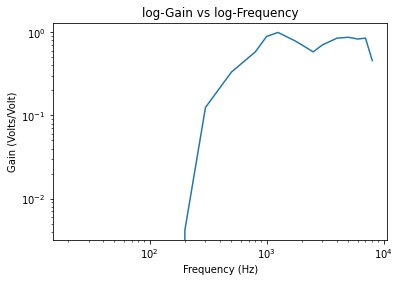

In [3]:
#Record the amplitude of the output sinusoid at each given frequency
freq = [20, 50, 200, 300, 500, 800, 1000, 1250, 1750, 2000, 2500, 3000, 4000, 5000, 6000, 7000, 8000]


Vpp = [0, 0, 0.02, 0.6, 1.6, 2.8, 4.3, 4.8, 3.8, 3.4, 2.8, 3.4, 4.1, 4.2, 4, 4.1, 2.2] #fill in your values here
# Vpp = [0, 0, 0.02, 0.6, 1.6, 2.8, 4.3, 4.8, 3.8, 3.4, 2.8, 3.4, 4.1, 4.2, 4, 4.1, 2.2] #fill in your values here

gain = np.array(Vpp)/max(Vpp)

plt.loglog(freq, gain)
plt.title('log-Gain vs log-Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (Volts/Volt)')

## Questions

<span style="color:#075a04"> **1.6.1. What do you notice about the shape of this function? Which frequencies result in large output?**</span>

#

<span style="color:#075a04"> **1.6.2. What does the plot tell you about the loudness of your speaker at certain frequencies? Does this reflect your experience listening to music?**</span>

Hint: low frequencies correspond to the bass in a song. Try playing something [bass-heavy :)](https://youtu.be/rCuBBaLtXQQ)

`YOUR ANSWER HERE`

<span style="color:#075a04">**1.6.3. Let's say you wanted to flatten out the frequency response of your system such that the gain is around the same across all frequencies. Suggest a way to accomplish this with the circuit elements you learned about in class.**</span>

`YOUR ANSWER HERE`


<a id='part2'></a>
# <span style="color:navy">Part 2: High Hello!</span>

-----


### 2.1. Build and Test the High-Pass Filter Circuit

#### Materials
- Capacitors
- Resistors
- Launchpad
- USB cable
- Phone speaker or headphones
- `oscope.ino`

#### Tasks:
1. On a sheet of paper, draw the circuit diagram for a first-order high pass RC filter. Write out the equation for its cutoff frequency $f_c$. 

- Choose values for $R$ and $C$ such that your cutoff frequency $f_c$ is in the range 5000 - 8000 Hz. Don't worry about getting the exact cutoff frequency you chose, since you have limited component values. If you're a few hundred Hz off from what you started with, just take that as your new frequency.
    
- Record your values for $R$, $C$, and $f_c$ in the code below.

- Build the high-pass filter on your breadboard.

- <span style="color:#ba190f"> **Instead of connecting the end of the resistor to ground, connect it to the `Half Rail`.**</span> <span style="color:#075a04"> **Sanity check: Why do we do this?** </span> Because we want it to match the offset where it is centered around 1.65V.

- **Unit test!** Check the filter's output using the tone generator, your mic board, and `oscope.ino` 
    - Move your mic board output to the input of your high pass filter.
    - Move the Launchpad's oscope probe (`P6.0`) to the output of your high pass
    - Connect the output of your high pass filter to the input of the peak detector.
    - Make sure the gain at the cutoff frequency is what you expect. <span style="color:#075a04"> **Sanity check: What value should this be?** </span>

#### Notes/Tips:
 
- Since we have far more resistor values than we have capacitor values, start by choosing an easy capacitor value. Pick one that that lets you choose resistors of at least 1kOhm.

- Because the frequencies are attentuated slowly in a first order filter, you may want to choose a cutoff frequency closer to the middle of the high-frequency range.

- You can always change your cutoff frequency later.

In [9]:
### YOUR CODE HERE
R = 40000
C = 0.000001 # 1 microF or 0.001 milliF
f_c = 7000

print("High pass filter")
print("================")
print("Resistor: {} ohms".format(R))
print("Capacitor: {} farads".format(C))
print("Cutoff frequency: {} Hz".format(f_c))

High pass filter
Resistor: 40000 ohms
Capacitor: 1e-06 farads
Cutoff frequency: 7000 Hz


### 2.2. Plot the Frequency Response of the Micboard High-Pass System

When desiging filters, it's helpful to visualize how the frequency response looks. 

Run the script below to plot the expected frequency response of your high pass filter. 

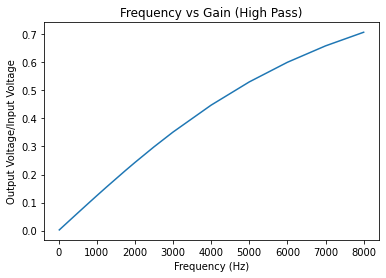

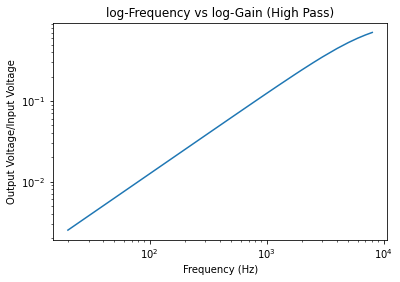

In [11]:
# high_cutoff = float() #TODO
high_cutoff = 8000 #TODO

hp_p2p_expected =  (np.array(freq)/high_cutoff)/(np.sqrt(1 + (np.array(freq)/high_cutoff)**2))

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (High Pass)")
plt.plot(freq, hp_p2p_expected)
plt.show()

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("log-Frequency vs log-Gain (High Pass)")
plt.loglog(freq, hp_p2p_expected)
plt.show()

Record the peak-to-peak voltage values into `hp_p2p_observed` for the given frequencies in `hp_freqs`, and observe how your recorded values match up to the calculated frequency response of your system.

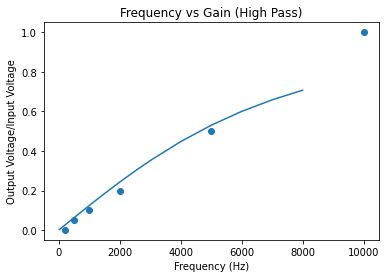

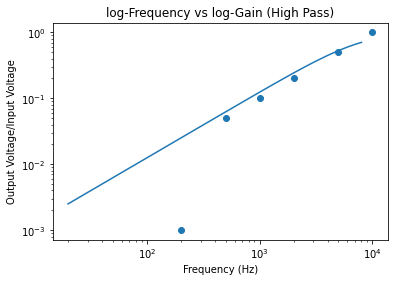

In [12]:
hp_freqs = [200, 500, 1000, 2000, 5000, 10000]
# hp_p2p_observed = [] #TODO
hp_p2p_observed = [0.001, 0.05, 0.1, 0.2, 0.5, 1] #TODO

hp_gain_observed = np.array(hp_p2p_observed)/np.max(hp_p2p_observed)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (High Pass)")
plt.plot(freq, hp_p2p_expected)
plt.scatter(hp_freqs, hp_gain_observed)
plt.show()

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("log-Frequency vs log-Gain (High Pass)")
plt.loglog(freq, hp_p2p_expected)
plt.scatter(hp_freqs, hp_gain_observed)
plt.show()

<span style="color:#075a04"> **Do your observed values match up with the expected frequency response of our high pass? Why or why not? _Hint: Are we accounting for our full system?_** </span>

`YOUR ANSWER HERE`

<span style="color:#075a04"> **What is the frequency response of your high-pass-filtered micboard in terms of the frequency response of your high pass filter and the frequency response of your micboard?**</span>

`YOUR ANSWER HERE`

Use the code below to plot the frequency response of your micboard-high pass filter system and compare it to the frequency response of just your micboard.

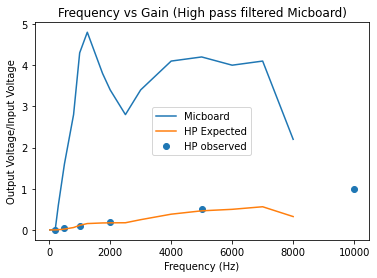

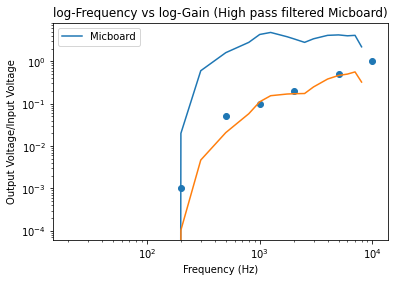

In [13]:
response_hp_micboard = np.multiply(hp_p2p_expected, gain)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (High pass filtered Micboard)")
plt.plot(freq, Vpp, label="Micboard")
plt.plot(freq, response_hp_micboard, label="HP Expected")
plt.scatter(hp_freqs, hp_p2p_observed, label="HP observed")
plt.legend()
plt.show()

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("log-Frequency vs log-Gain (High pass filtered Micboard)")
plt.loglog(freq, Vpp, label="Micboard")
plt.loglog(freq, response_hp_micboard)
plt.scatter(hp_freqs, hp_p2p_observed)
plt.legend()
plt.show()

Does your observed values match up with the frequency response of our full system?

### 2.3 Amplify the High-Pass Signal
1. Follow your filter with a non-inverting amplifier and LED/resistor as shown below.
    - Try different gains to get the LED to brighten or light up more in the frequency range that you want. To figure out how much to raise or lower your gain, _refer to the frequency response plot!_
    - If you find that you don't actually need a gain (the output is fine as is), just change the non-inverting amplifier to a buffer.

- Make some noises at your microphone. Does the brightness of the LED change?
    - Use the `oscope.ino` script to check the peak-to-peak voltages for specific frequencies.
    - Try playing some different frequencies from this [tone generator website](http://www.szynalski.com/tone-generator/) and make sure the LED brightens or lights up for frequencies in your expected frequency range.

- Here is the final circuit schematic:
    

<img style="width:750px" src="images/sp21_high_pass.png">


<a id='checkoff'> </a>

# Checkoff

### For Checkoff:
- Show your GSI your:
    - working micboard system
    - high pass filter
    - relevant plots
- Be prepared to answer some questions.
- [Checkoff link](http://tinyurl.com/16b-checkoff-sp21)

**After checkoff, please:**

- <span style="color:#ff0000"> **Keep all the circuits you built in this lab on your breadboard!**   </span> You will be using these for the project!
- Store all your electrical components in a neat and organized manner.
- Make sure that all components that you received in your lab kit are stored safely for use in future labs.